In [1]:
import numpy as np
from math import sin, cos, pi, sqrt, factorial, fabs, acos

In [2]:
from numpy.fft import ifft, fft

In [51]:
Lmax = 1

In [52]:
a_coef = np.random.normal(size = (Lmax+1, Lmax+1))
b_coef = np.random.normal(size = (Lmax+1, Lmax+1))

#a_coef = np.ones((Lmax+1, Lmax+1))
#b_coef = np.ones((Lmax+1, Lmax+1))

a_coef[0][0] = 0.0

for m in xrange(0, Lmax+1):
    for l in xrange(0, m):
        a_coef[m][l] = 0.0     
        
for m in xrange(0, Lmax+1):
    for l in xrange(0, m):
        b_coef[m][l] = 0.0
        
for l in xrange(0, Lmax+1):
        b_coef[0][l] = 0.0

In [53]:
N = 512
field = np.zeros((N, N/2))
x = np.zeros((N, N/2))
y = np.zeros((N, N/2))

In [54]:
for j in xrange(0, N/2):
    
        teta = pi/2*j*4/float(N)
        
        P_ = np.zeros((Lmax+1, Lmax+1))
        
        P_[0][0] = 1/sqrt(4*pi)
        
        for m in xrange(1, Lmax+1):
            P_[m][m] = P_[m-1][m-1]*(-sin(teta))*sqrt(2*m+3)/sqrt(2*m+2)
        
        for m in xrange(0, Lmax):
            P_[m][m+1] = P_[m][m]*cos(teta)*sqrt(2*m+3)
            
        for m in xrange(0, Lmax-1):
            for l in xrange(m+2, Lmax+1):
                P_[m][l] = sqrt((2*l+1)*(l-1-m))/sqrt(l**2-m**2)*(cos(teta)*sqrt(2*l-1)/sqrt(l-1-m)*P_[m][l-1] - sqrt(l+m-1)/sqrt(2*l-3)*P_[m][l-2])
                
        F = np.zeros((N+1))
        F_ = np.zeros((N+1))     
        
        func1 = 0.0
        func2 = 0.0
        
        for m in xrange(0, Lmax+1):
            for l in xrange(m, Lmax+1):
                func1 = func1 + a_coef[m][l]*P_[m][l]
                func2 = func2 + b_coef[m][l]*P_[m][l]
    
            F[m] = func1
            F_[m] = func2
                
            func1 = 0.0
            func2 = 0.0
    
        T = np.real(fft(F)) + np.imag(fft(F_))
        
        for i in xrange(0, N):
            phi = i*2/float(N)*pi
           
            field[i][j] = T[i]
            
            x[i][j] = (i-N/2)*2/float(N)*pi
            y[i][j] = teta - pi/2*(N/4)*4/float(N)

In [55]:
print F[0: 10]
print F_[0: 10]

[-0.54885201 -0.00359045  0.          0.          0.          0.          0.
  0.          0.          0.        ]
[ 0.        -0.0001109  0.         0.         0.         0.         0.         0.
  0.         0.       ]


In [56]:
field.shape

(512, 256)

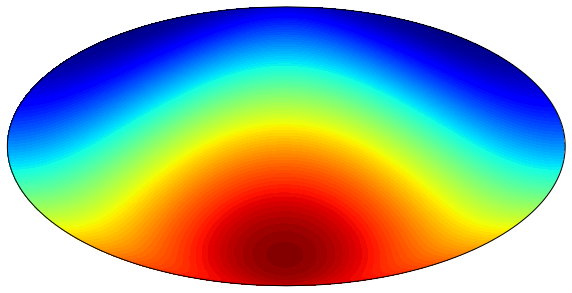

In [57]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

RAD = 180/np.pi

plt.figure(figsize=(10,5))
m = Basemap(projection='moll',lon_0=0,resolution='c')
#m.contour(X*RAD, Y*RAD, Z, 10, colors='k',latlon=True)
m.contourf(x*RAD, y*RAD, field, 100, cmap=plt.cm.jet,latlon=True)

plt.show()

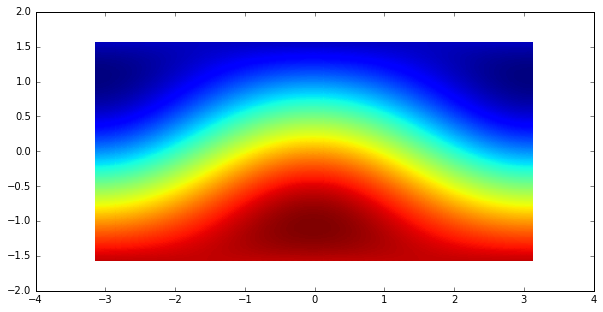

In [58]:
plt.figure(figsize=(10,5))
ax = plt.pcolormesh(x, y, field)
plt.show()

In [690]:
sum = 0.0

teta = y + pi/2*(N/4)*4/float(N)

for i in xrange(0, N/2):
    for j in xrange(1, N/2):
        sum = sum + sin(teta[i][j])
        
for i in xrange(N/2+1, N):
    for j in xrange(1, N/2):
        sum = sum + sin(teta[i][j])
        
print sum
print 2*sum/(N*N)

50801.2132511
0.635015165638


In [735]:
sum1 = 0.0

teta = y + pi/2*(N/4)*4/float(N)

for i in xrange(0, N/2):
    for j in xrange(1, N/2):
        sum1 = sum1 + sin(teta[i][j])*(field[i][j])**2
        
for i in xrange(N/2+1, N):
    for j in xrange(1, N/2):
        sum1 = sum1 + sin(teta[i][j])*(field[i][j])**2
        
print sum1/sum

610195.406663


In [692]:
sum2 = 0.0
sum3 = 0.0 

for m in xrange(0, Lmax+1):
    for l in xrange(m, Lmax+1):
        sum2 = sum2 + (a_coef[m][l])**2
        
for m in xrange(0, Lmax+1):
    for l in xrange(m, Lmax+1):
        sum2 = sum2 + (b_coef[m][l])**2
        sum3 = sum3 + 1
        

print sum3
print sum2/sum3
print sum1/(sum2*sum)
print sum3

3.0
0.466477155466
0.0337657022927
3.0


In [808]:
a_coef

array([[ 0.,  1.,  1.],
       [ 0.,  1.,  1.],
       [ 0.,  0.,  1.]])

In [809]:
b_coef

array([[ 0.,  0.,  0.],
       [ 0.,  1.,  1.],
       [ 0.,  0.,  1.]])

In [388]:
field

array([[-0.00250763, -0.00250945, -0.00251065, ...,  0.00249847,
         0.00250214,  0.0025052 ],
       [-0.00250763, -0.00250934, -0.00251042, ...,  0.00249881,
         0.00250237,  0.00250531],
       [-0.00250763, -0.00250922, -0.00251019, ...,  0.00249915,
         0.00250259,  0.00250542],
       ..., 
       [-0.00250763, -0.00250989, -0.00251154, ...,  0.00249713,
         0.00250125,  0.00250475],
       [-0.00250763, -0.00250978, -0.00251132, ...,  0.00249746,
         0.00250147,  0.00250486],
       [-0.00250763, -0.00250967, -0.00251109, ...,  0.0024978 ,
         0.00250169,  0.00250497]])

In [ ]:
field

In [435]:
print F[0:5]
print 

[  8.46170157e-01  -3.85422209e-03  -4.05327867e-05   0.00000000e+00
   0.00000000e+00]
[ 0.        -0.0123795 -0.0001052  0.         0.       ]


In [431]:
F_

array([ 0.       , -0.0123795, -0.0001052,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
        0.       ,  0.       ,  0.       ,  0.       ,  0.    

In [ ]:
P_

In [ ]:
field

In [ ]:
np.sin(y+pi/2*(N/4)*4/float(N))[0]

In [ ]:
y+pi/2*(N/4)*4/float(N)

In [ ]:
F

In [ ]:
field

In [ ]:
b_coef

In [ ]:
P_

In [48]:
level = 0.0
f = field

In [59]:
# S
area = 0.0
narea = 0.0


for i in xrange(0, N-1):
    for j in xrange(1, N/2-1):
        if ((f[i][j] + f[i+1][j+1] + f[i+1][j] + f[i][j+1])/4.0 > level):
            area = area + fabs(sin(y[i][j]))
            
for i in xrange(0, N-1):
    for j in xrange(1, N/2-1):
            narea = narea + fabs(sin(y[i][j]))            

area = area/narea
print area

0.503509333254


In [60]:
# l

l = 0.0
n = 0.0
nl = 0.0

f = field - level

teta = y
phi = x

for i in xrange(0, N-1):
    for j in xrange(0, N/2-1):
        
        
        h_teta = y[N/2+1][N/4+1]
        h_phi = fabs(x[i][0] - x[i+1][0])
        
        sql = 0.0
         
        phi1 = 0.0
        phi2 = 0.0
        teta1 = 0.0
        teta2 = 0.0
        
        if (f[i][j]*f[i][j+1] < 0.0):
                    
            if (f[i][j]*f[i+1][j] < 0.0):
                
                phi1 = phi[i][j]
                teta1 = teta[i][j] + h_teta*fabs(f[i][j])/(fabs(f[i][j]) + fabs(f[i][j+1]))
            
                teta2 = teta[i][j]
                phi2 = phi[i][j] + h_phi*fabs(f[i][j])/(fabs(f[i][j]) + fabs(f[i+1][j]))
                
                #sq = [cos(teta1)*sin(phi1)*sin(teta2) - sin(teta1)*cos(teta2)*sin(phi2), sin(teta1)*cos(teta2)*cos(phi2) - cos(teta1)*cos(phi1)*sin(teta2), cos(teta1)*cos(phi1)*cos(teta2)*sin(phi2) - cos(teta1)*sin(phi1)*cos(teta2)*cos(phi2)]
                #sql = sqrt(sq[0]**2 + sq[1]**2 + sq[2]**2)   
                
                sql = acos(sin(teta1)*sin(teta2) + cos(teta1)*cos(teta2)*cos(phi1 - phi2))
                
                l = l + sql
            
            if (f[i+1][j]*f[i+1][j+1] < 0.0):
                
                phi1 = phi[i][j]
                teta1 = teta[i][j] + h_teta*fabs(f[i][j])/(fabs(f[i][j]) + fabs(f[i][j+1]))
                
                phi2 = phi[i+1][j]
                teta2 = teta[i+1][j] + h_teta*fabs(f[i+1][j])/(fabs(f[i+1][j]) + fabs(f[i+1][j+1]))
                
                #sq = [cos(teta1)*sin(phi1)*sin(teta2) - sin(teta1)*cos(teta2)*sin(phi2), sin(teta1)*cos(teta2)*cos(phi2) - cos(teta1)*cos(phi1)*sin(teta2), cos(teta1)*cos(phi1)*cos(teta2)*sin(phi2) - cos(teta1)*sin(phi1)*cos(teta2)*cos(phi2)]
                #sql = sqrt(sq[0]**2 + sq[1]**2 + sq[2]**2)   
                
                sql = acos(sin(teta1)*sin(teta2) + cos(teta1)*cos(teta2)*cos(phi1 - phi2))
                
                l = l + sql
                
            
            if (f[i][j+1]*f[i+1][j+1] < 0.0):
                
                phi1 = phi[i][j]
                teta1 = teta[i][j] + h_teta*fabs(f[i][j])/(fabs(f[i][j]) + fabs(f[i][j+1]))
                
                teta2 = teta[i][j+1]
                phi2 = phi[i][j+1] + h_phi*fabs(f[i][j+1])/(fabs(f[i][j+1]) + fabs(f[i+1][j+1]))
                
                #sq = [cos(teta1)*sin(phi1)*sin(teta2) - sin(teta1)*cos(teta2)*sin(phi2), sin(teta1)*cos(teta2)*cos(phi2) - cos(teta1)*cos(phi1)*sin(teta2), cos(teta1)*cos(phi1)*cos(teta2)*sin(phi2) - cos(teta1)*sin(phi1)*cos(teta2)*cos(phi2)]
                #sql = sqrt(sq[0]**2 + sq[1]**2 + sq[2]**2)   
                
                sql = acos(sin(teta1)*sin(teta2) + cos(teta1)*cos(teta2)*cos(phi1 - phi2))
                
                l = l + sql
                
                
            
        if (f[i][j]*f[i+1][j] < 0.0):
            
            if (f[i+1][j]*f[i+1][j+1] < 0.0):
                
                teta1 = teta[i][j]
                phi1 = phi[i][j] + h_phi*fabs(f[i][j])/(fabs(f[i][j]) + fabs(f[i+1][j]))
                
                phi2 = phi[i+1][j]
                teta2 = teta[i+1][j] + h_teta*fabs(f[i+1][j])/(fabs(f[i+1][j]) + fabs(f[i+1][j+1]))
                
                #sq = [cos(teta1)*sin(phi1)*sin(teta2) - sin(teta1)*cos(teta2)*sin(phi2), sin(teta1)*cos(teta2)*cos(phi2) - cos(teta1)*cos(phi1)*sin(teta2), cos(teta1)*cos(phi1)*cos(teta2)*sin(phi2) - cos(teta1)*sin(phi1)*cos(teta2)*cos(phi2)]
                #sql = sqrt(sq[0]**2 + sq[1]**2 + sq[2]**2)  
                
                sql = acos(sin(teta1)*sin(teta2) + cos(teta1)*cos(teta2)*cos(phi1 - phi2))
                
                l = l + sql
                
            
            if (f[i][j+1]*f[i+1][j+1] < 0.0):
                
                teta1 = teta[i][j]
                phi1 = phi[i][j] + h_phi*fabs(f[i][j])/(fabs(f[i][j]) + fabs(f[i+1][j]))
                
                teta2 = teta[i][j+1]
                phi2 = phi[i][j+1] + h_phi*fabs(f[i][j+1])/(fabs(f[i][j+1]) + fabs(f[i+1][j+1]))
                
                #sq = [cos(teta1)*sin(phi1)*sin(teta2) - sin(teta1)*cos(teta2)*sin(phi2), sin(teta1)*cos(teta2)*cos(phi2) - cos(teta1)*cos(phi1)*sin(teta2), cos(teta1)*cos(phi1)*cos(teta2)*sin(phi2) - cos(teta1)*sin(phi1)*cos(teta2)*cos(phi2)]
                #sql = sqrt(sq[0]**2 + sq[1]**2 + sq[2]**2)   
                
                sql = acos(sin(teta1)*sin(teta2) + cos(teta1)*cos(teta2)*cos(phi1 - phi2))
                
                l = l + sql
            
        if (f[i+1][j]*f[i+1][j+1] < 0.0):
            
            if (f[i][j+1]*f[i+1][j+1] < 0.0):
                
                phi1 = phi[i+1][j]
                teta1 = teta[i+1][j] + h_teta*fabs(f[i+1][j])/(fabs(f[i+1][j]) + fabs(f[i+1][j+1]))
                
                teta2 = teta[i][j+1]
                phi2 = phi[i][j+1] + h_phi*fabs(f[i][j+1])/(fabs(f[i][j+1]) + fabs(f[i+1][j+1]))
                
                #sq = [cos(teta1)*sin(phi1)*sin(teta2) - sin(teta1)*cos(teta2)*sin(phi2), sin(teta1)*cos(teta2)*cos(phi2) - cos(teta1)*cos(phi1)*sin(teta2), cos(teta1)*cos(phi1)*cos(teta2)*sin(phi2) - cos(teta1)*sin(phi1)*cos(teta2)*cos(phi2)]
                #sql = sqrt(sq[0]**2 + sq[1]**2 + sq[2]**2) 
                
                sql = acos(sin(teta1)*sin(teta2) + cos(teta1)*cos(teta2)*cos(phi1 - phi2))
                
                l = l + sql
            
        if (sql != 0.0):
            n = n + 1
            #print i, j
        nl = nl + 1    
    
print l/pi
#print n
#print nl
#print l/n

1.99655313743


In [864]:
from numpy import *



def fac(n):
    result = 1

    for i in range(2, n+1):
        result *= i

    return result





# coefficient function
def Cslm(s, l, m):
    return sqrt( l*l * (4.0*l*l - 1.0) / ( (l*l - m*m) * (l*l - s*s) ) )




# recursion function
def s_lambda_lm(s, l, m, x):

    Pm = pow(-0.5, m)

    if (m !=  s): Pm = Pm * pow(1.0+x, (m-s)*1.0/2)
    if (m != -s): Pm = Pm * pow(1.0-x, (m+s)*1.0/2)
   
    Pm = Pm * sqrt( fac(2*m + 1) * 1.0 / ( 4.0*pi * fac(m+s) * fac(m-s) ) )
   
    if (l == m):
        return Pm
   
    Pm1 = (x + s*1.0/(m+1) ) * Cslm(s, m+1, m) * Pm
   
    if (l == m+1):
        return Pm1
    else:
        for n in range (m+2, l+1):
      
            Pn = (x + s*m * 1.0 / ( n * (n-1.0) ) ) * Cslm(s, n, m) * Pm1 - Cslm(s, n, m) * 1.0 / Cslm(s, n-1, m) * Pm
            Pm = Pm1
            Pm1 = Pn
         
      
        return Pn







def sYlm(ss, ll, mm, theta, phi):
   
    Pm = 1.0

    l = ll
    m = mm
    s = ss

    if (l < 0):
        return 0
    if (abs(m) > l or l < abs(s)):
        return 0

    if (abs(mm) < abs(ss)):
        s=mm
        m=ss
        if ((m+s) % 2):
            Pm  = -Pm

   
    if (m < 0):
        s=-s
        m=-m
        if ((m+s) % 2):
            Pm  = -Pm

    result = Pm * s_lambda_lm(s, l, m, cos(theta))

    return complex(result * cos(mm*phi), result * sin(mm*phi))


In [865]:
sYlm(-2, 5, 0, 1.0, 0.0)

(-0.08054129322032011-0j)

In [866]:
N = 400
field = np.zeros((N, N/2))
x = np.zeros((N, N/2))
y = np.zeros((N, N/2))

In [898]:
for i in xrange(0, N-1):
    for j in xrange(0, N/2-1): 
        
        teta = pi/2*j*4/float(N)
        phi = i*2/float(N)*pi
            
        x[i][j] = (i-N/2)*2/float(N)*pi
        y[i][j] = teta - pi/2*(N/4)*4/float(N)
        
        field[i][j] = real(sYlm(0, 2, 1, teta, phi))

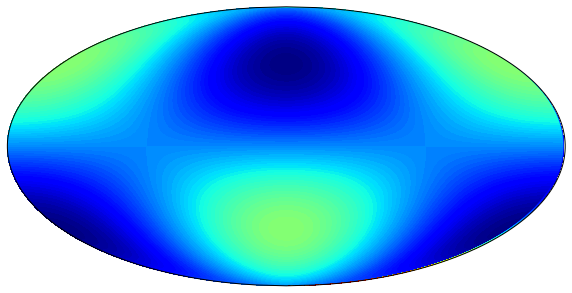

In [899]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

RAD = 180/np.pi

plt.figure(figsize=(10,5))
m = Basemap(projection='moll',lon_0=0,resolution='c')
#m.contour(X*RAD, Y*RAD, Z, 10, colors='k',latlon=True)
m.contourf(x*RAD, y*RAD, field, 100, cmap=plt.cm.jet,latlon=True)

plt.show()

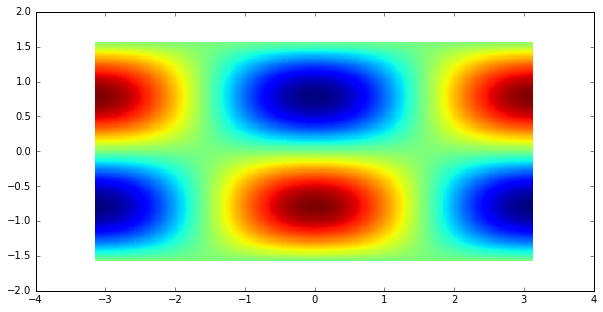

In [889]:
plt.figure(figsize=(10,5))
ax = plt.pcolormesh(x, y, field)
plt.show()

In [ ]:
for i in xrange(0, N-1):
    for j in xrange(0, N/2-1): 
        
        teta = pi/2*j*4/float(N)
        phi = i*2/float(N)*pi
            
        x[i][j] = (i-N/2)*2/float(N)*pi
        y[i][j] = teta - pi/2*(N/4)*4/float(N)
        
        field[i][j] = sin(teta)**2

In [ ]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

RAD = 180/np.pi

plt.figure(figsize=(10,5))
m = Basemap(projection='moll',lon_0=0,resolution='c')
#m.contour(X*RAD, Y*RAD, Z, 10, colors='k',latlon=True)
m.contourf(x*RAD, y*RAD, field, 100, cmap=plt.cm.jet,latlon=True)

plt.show()

In [ ]:
plt.figure(figsize=(10,5))
ax = plt.pcolormesh(x, y, field)
plt.show()

In [553]:
if (1):    
        j = 4
        teta = pi/2*j*4/float(N)
        
        P_ = np.zeros((Lmax+1, Lmax+1))
        
        P_[0][0] = 1/sqrt(4*pi)
        
        for m in xrange(1, Lmax+1):
            P_[m][m] = P_[m-1][m-1]*(-sin(teta))*sqrt(2*m+3)/sqrt(2*m+2)
        
        for m in xrange(0, Lmax):
            P_[m][m+1] = P_[m][m]*cos(teta)*sqrt(2*m+3)
            
        for m in xrange(0, Lmax-1):
            for l in xrange(m+2, Lmax+1):
                P_[m][l] = sqrt((2*l+1)*(l-1-m))/sqrt(l**2-m**2)*(cos(teta)*sqrt(2*l-1)/sqrt(l-1-m)*P_[m][l-1] - sqrt(l+m-1)/sqrt(2*l-3)*P_[m][l-2])
                
        F = np.zeros((N+1))
        F_ = np.zeros((N+1))     
        
        func1 = 0.0
        func2 = 0.0
        
        for m in xrange(0, Lmax+1):
            for l in xrange(m, Lmax+1):
                func1 = func1 + a_coef[m][l]*P_[m][l]
                func2 = func2 + b_coef[m][l]*P_[m][l]
    
            F[m] = func1
            F_[m] = func2
                
            func1 = 0.0
            func2 = 0.0
        
        F_[0] = 0.0
        F[0] = 0.0 
    
        T = np.real(fft(F)) + np.imag(fft(F_))
        
        for i in xrange(0, N):
            phi = i*2/float(N)*pi
           
            field[i][j] = T[i]
            
            x[i][j] = (i-N/2)*2/float(N)*pi
            y[i][j] = teta - pi/2*(N/4)*4/float(N)

In [554]:
sum = 0.0
for i in xrange(0, N):
    sum = sum + field[i][4]**2
print sum/400

0.000202995716483


In [555]:
print F[:6]
print F_[:6]

[ 0.          0.00597496  0.          0.          0.          0.        ]
[ 0.          0.01922174  0.          0.          0.          0.        ]


In [556]:
field[1][4]

0.0056730544454509178

In [696]:
sum = 0.0
for i in xrange(0, Lmax+1):
    sum = sum + (F[i])**2
print sum

0.00393398384512


In [697]:
N = 400
field1 = np.zeros((N, N/2))
x = np.zeros((N, N/2))
y = np.zeros((N, N/2))

In [841]:
for j in xrange(0, N/2):
    
        teta = pi/2*j*4/float(N)
        
        for i in xrange(0, N):
            phi = i*2/float(N)*pi
           
            field1[i][j] = sqrt(3/(8*pi))*(sqrt(2)*cos(teta) + (-sin(teta)*cos(phi)) + (-sin(teta)*sin(phi)))
            
            x[i][j] = (i-N/2)*2/float(N)*pi
            y[i][j] = teta - pi/2*(N/4)*4/float(N)

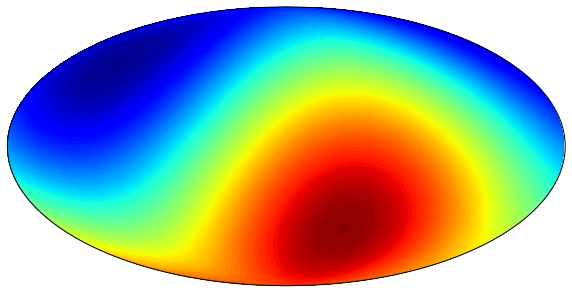

In [842]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

RAD = 180/np.pi

plt.figure(figsize=(10,5))
m = Basemap(projection='moll',lon_0=0,resolution='c')
#m.contour(X*RAD, Y*RAD, Z, 10, colors='k',latlon=True)
m.contourf(x*RAD, y*RAD, field1, 100, cmap=plt.cm.jet,latlon=True)

plt.show()

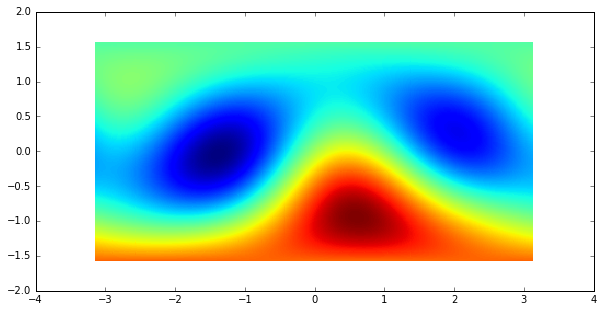

In [845]:
plt.figure(figsize=(10,5))
ax = plt.pcolormesh(x, y, field1)
plt.show()

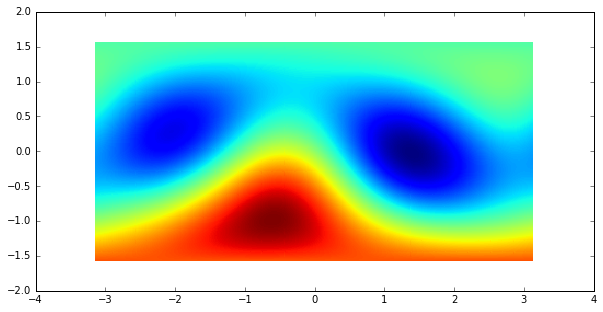

In [851]:
plt.figure(figsize=(10,5))
ax = plt.pcolormesh(x, y, field)
plt.show()

In [852]:
sum1 = 0.0

teta = y + pi/2*(N/4)*4/float(N)

for i in xrange(0, N/2):
    for j in xrange(1, N/2):
        sum1 = sum1 + sin(teta[i][j])*(field1[i][j])**2
        
for i in xrange(N/2+1, N):
    for j in xrange(1, N/2):
        sum1 = sum1 + sin(teta[i][j])*(field1[i][j])**2
        
print sum1/sum3
print sqrt(sum1/sum3)

0.397386975319
0.630386369871


In [853]:
sum3 = 0.0

teta = y + pi/2*(N/4)*4/float(N)

for i in xrange(0, N/2):
    for j in xrange(1, N/2):
        sum3 = sum3 + sin(teta[i][j])
        
for i in xrange(N/2+1, N):
    for j in xrange(1, N/2):
        sum3 = sum3 + sin(teta[i][j])
        
print sum3

50801.2132511


In [854]:
sum1 = 0.0

teta = y + pi/2*(N/4)*4/float(N)

for i in xrange(0, N/2):
    for j in xrange(1, N/2):
        sum1 = sum1 + sin(teta[i][j])*(field[i][j])**2
        
for i in xrange(N/2+1, N):
    for j in xrange(1, N/2):
        sum1 = sum1 + sin(teta[i][j])*(field[i][j])**2
        
print sum1/sum3
print sqrt(sum1/sum3)

0.353944820357
0.594932618333


In [844]:
for j in xrange(0, N/2):
    
        teta = pi/2*j*4/float(N)
        
        for i in xrange(0, N):
            phi = i*2/float(N)*pi
           
            field1[i][j] = 0.25*sqrt(15/(2*pi))*sin(teta)**2*(cos(2*phi) + sin(2*phi)) - sqrt(15/(8*pi))*sin(teta)*cos(teta)*(cos(phi) + sin(phi)) + sqrt(5/(4*pi))*(1.5*cos(teta)**2-0.5) + sqrt(3/(8*pi))*(sqrt(2)*cos(teta) + (-sin(teta)*cos(phi)) + (-sin(teta)*sin(phi)))
            
            x[i][j] = (i-N/2)*2/float(N)*pi
            y[i][j] = teta - pi/2*(N/4)*4/float(N)

In [903]:
print field[0][:10]
print field1[0][:10]

[-0.         -0.01213317 -0.02425436 -0.03635161 -0.04841299 -0.0604266
 -0.07238057 -0.08426311 -0.09606249 -0.10776707]
[ 1.11938564  1.10162727  1.08348554  1.06497419  1.04610725  1.02689904
  1.00736408  0.98751717  0.96737333  0.94694777]


# HEAD

In [925]:
N = 400
field1 = np.zeros((N, N/2))
x = np.zeros((N, N/2))
y = np.zeros((N, N/2))

In [926]:
for j in xrange(0, N/2):
    
        teta = pi/2*j*4/float(N)
        
        for i in xrange(0, N):
            phi = i*2/float(N)*pi
           
            field[i][j] = -sin(teta)*sqrt(3/(8*pi))*cos(phi)
            
            x[i][j] = (i-N/2)*2/float(N)*pi
            y[i][j] = teta - pi/2*(N/4)*4/float(N)

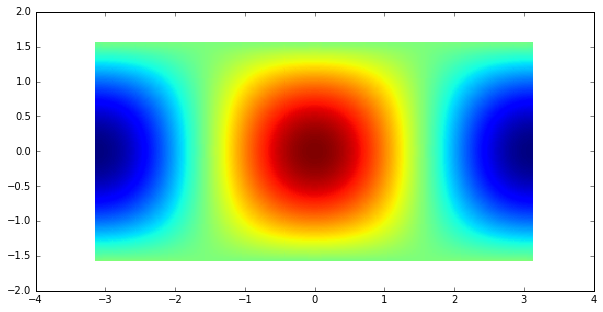

In [927]:
plt.figure(figsize=(10,5))
ax = plt.pcolormesh(x, y, field)
plt.show()

In [928]:
field[0][0:10]

array([-0.        , -0.00542679, -0.01085223, -0.016275  , -0.02169376,
       -0.02710716, -0.03251387, -0.03791256, -0.0433019 , -0.04868055])

In [929]:
for i in xrange(0, N-1):
    for j in xrange(0, N/2-1): 
        
        teta = pi/2*j*4/float(N)
        phi = i*2/float(N)*pi
            
        x[i][j] = (i-N/2)*2/float(N)*pi
        y[i][j] = teta - pi/2*(N/4)*4/float(N)
        
        field[i][j] = real(sYlm(0, 1, 1, teta, phi))

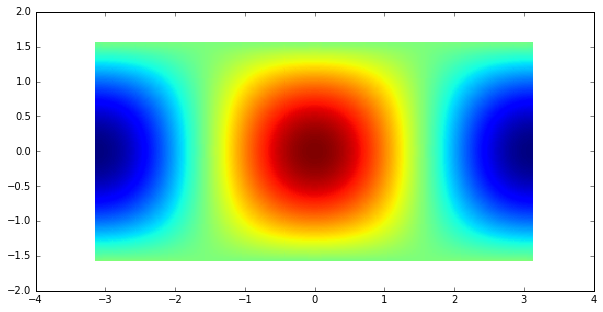

In [930]:
plt.figure(figsize=(10,5))
ax = plt.pcolormesh(x, y, field)
plt.show()

In [931]:
field[0][0:10]

array([-0.        , -0.00542679, -0.01085223, -0.016275  , -0.02169376,
       -0.02710716, -0.03251387, -0.03791256, -0.0433019 , -0.04868055])

# HEAD2

In [932]:
N = 400
field1 = np.zeros((N, N/2))
x = np.zeros((N, N/2))
y = np.zeros((N, N/2))

In [933]:
for j in xrange(0, N/2):
    
        teta = pi/2*j*4/float(N)
        
        for i in xrange(0, N):
            phi = i*2/float(N)*pi
           
            field[i][j] = -sqrt(15/(8*pi))*sin(teta)*cos(teta)*cos(phi)
            
            x[i][j] = (i-N/2)*2/float(N)*pi
            y[i][j] = teta - pi/2*(N/4)*4/float(N)

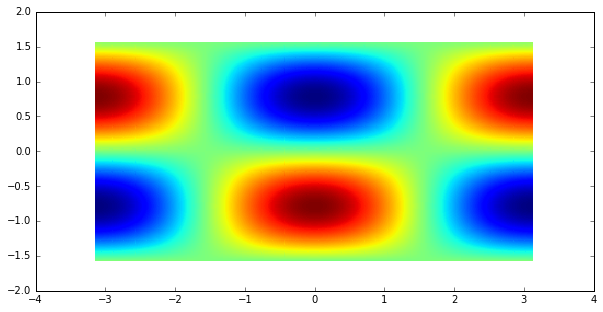

In [934]:
plt.figure(figsize=(10,5))
ax = plt.pcolormesh(x, y, field)
plt.show()

In [935]:
field[0][0:10]

array([-0.        , -0.01213317, -0.02425436, -0.03635161, -0.04841299,
       -0.0604266 , -0.07238057, -0.08426311, -0.09606249, -0.10776707])

In [936]:
for i in xrange(0, N-1):
    for j in xrange(0, N/2-1): 
        
        teta = pi/2*j*4/float(N)
        phi = i*2/float(N)*pi
            
        x[i][j] = (i-N/2)*2/float(N)*pi
        y[i][j] = teta - pi/2*(N/4)*4/float(N)
        
        field[i][j] = real(sYlm(0, 2, 1, teta, phi))

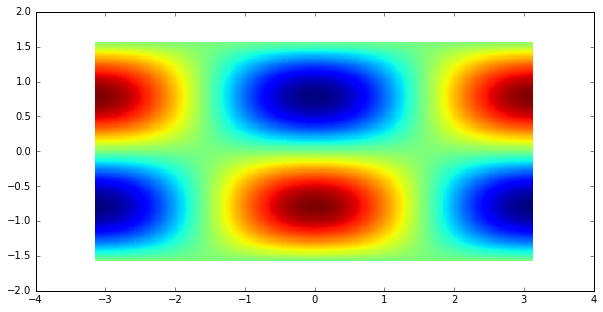

In [937]:
plt.figure(figsize=(10,5))
ax = plt.pcolormesh(x, y, field)
plt.show()

In [938]:
field[0][0:10]

array([-0.        , -0.01213317, -0.02425436, -0.03635161, -0.04841299,
       -0.0604266 , -0.07238057, -0.08426311, -0.09606249, -0.10776707])

# HEAD (http://background.uchicago.edu/~whu/tamm/webversion/img23.gif)

In [952]:
N = 400
field1 = np.zeros((N, N/2))
x = np.zeros((N, N/2))
y = np.zeros((N, N/2))

In [953]:
for j in xrange(0, N/2):
    
        teta = pi/2*j*4/float(N)
        
        for i in xrange(0, N):
            phi = i*2/float(N)*pi
           
            field[i][j] = 0.25*sqrt(5/pi)*sin(teta)*(1-cos(teta))*cos(phi)
            
            x[i][j] = (i-N/2)*2/float(N)*pi
            y[i][j] = teta - pi/2*(N/4)*4/float(N)

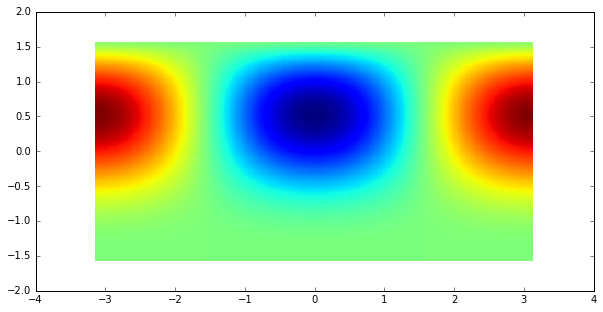

In [954]:
plt.figure(figsize=(10,5))
ax = plt.pcolormesh(x, y, field)
plt.show()

In [955]:
field[0][0:10]

array([  0.00000000e+00,   6.11157183e-07,   4.88835274e-06,
         1.64931024e-05,   3.90778814e-05,   7.62816157e-05,
         1.31725188e-04,   2.09006960e-04,   3.11698324e-04,
         4.43339274e-04])

In [956]:
for i in xrange(0, N-1):
    for j in xrange(0, N/2-1): 
        
        teta = pi/2*j*4/float(N)
        phi = i*2/float(N)*pi
            
        x[i][j] = (i-N/2)*2/float(N)*pi
        y[i][j] = teta - pi/2*(N/4)*4/float(N)
        
        field[i][j] = -real(sYlm(2, 2, 1, teta, phi))

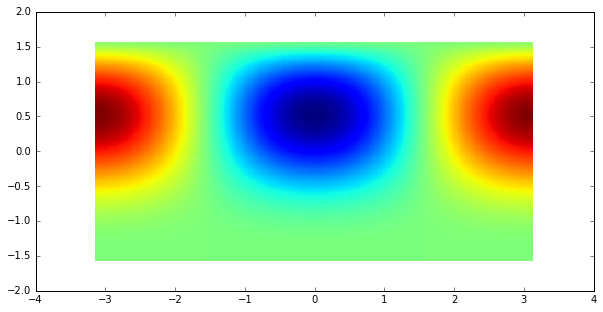

In [957]:
plt.figure(figsize=(10,5))
ax = plt.pcolormesh(x, y, field)
plt.show()

In [958]:
field[0][0:10]

array([  0.00000000e+00,   6.11157183e-07,   4.88835274e-06,
         1.64931024e-05,   3.90778814e-05,   7.62816157e-05,
         1.31725188e-04,   2.09006960e-04,   3.11698324e-04,
         4.43339274e-04])

# HEAD2 (http://background.uchicago.edu/~whu/tamm/webversion/img23.gif)

In [970]:
N = 400
field1 = np.zeros((N, N/2))
x = np.zeros((N, N/2))
y = np.zeros((N, N/2))

In [959]:
for j in xrange(0, N/2):
    
        teta = pi/2*j*4/float(N)
        
        for i in xrange(0, N):
            phi = i*2/float(N)*pi
           
            field[i][j] = sqrt(5/pi)/8*(1-cos(teta))**2*cos(2*phi)
            
            x[i][j] = (i-N/2)*2/float(N)*pi
            y[i][j] = teta - pi/2*(N/4)*4/float(N)

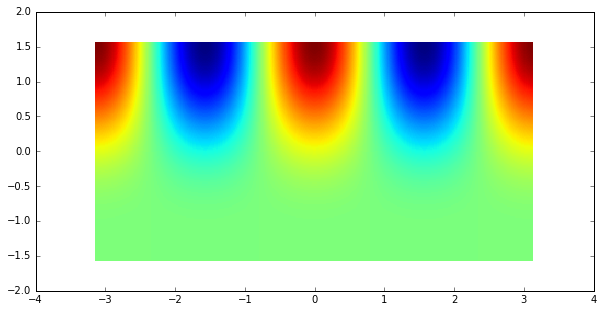

In [960]:
plt.figure(figsize=(10,5))
ax = plt.pcolormesh(x, y, field)
plt.show()

In [961]:
field[0][0:10]

array([  0.00000000e+00,   2.40005799e-09,   3.83961906e-08,
         1.94340750e-07,   6.14035948e-07,   1.49855642e-06,
         3.10600108e-06,   5.75117450e-06,   9.80519818e-06,
         1.56950521e-05])

In [971]:
for i in xrange(0, N):
    for j in xrange(0, N/2): 
        
        teta = pi/2*j*4/float(N)
        phi = i*2/float(N)*pi
            
        x[i][j] = (i-N/2)*2/float(N)*pi
        y[i][j] = teta - pi/2*(N/4)*4/float(N)
        
        field[i][j] = real(sYlm(2, 2, 2, teta, phi))

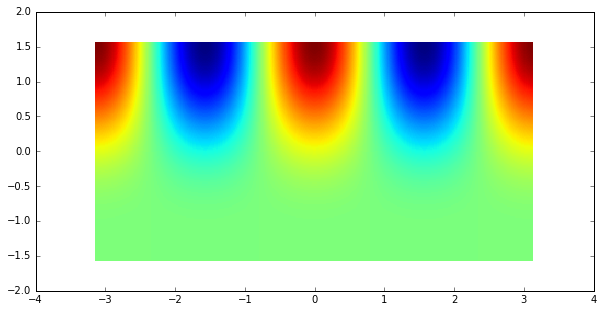

In [972]:
plt.figure(figsize=(10,5))
ax = plt.pcolormesh(x, y, field)
plt.show()

In [969]:
field[0][0:10]

array([  0.00000000e+00,   2.40005799e-09,   3.83961906e-08,
         1.94340750e-07,   6.14035948e-07,   1.49855642e-06,
         3.10600108e-06,   5.75117450e-06,   9.80519818e-06,
         1.56950521e-05])

In [46]:
x[N/2+1]

array([ 0.01227185,  0.01227185,  0.01227185,  0.01227185,  0.01227185,
        0.01227185,  0.01227185,  0.01227185,  0.01227185,  0.01227185,
        0.01227185,  0.01227185,  0.01227185,  0.01227185,  0.01227185,
        0.01227185,  0.01227185,  0.01227185,  0.01227185,  0.01227185,
        0.01227185,  0.01227185,  0.01227185,  0.01227185,  0.01227185,
        0.01227185,  0.01227185,  0.01227185,  0.01227185,  0.01227185,
        0.01227185,  0.01227185,  0.01227185,  0.01227185,  0.01227185,
        0.01227185,  0.01227185,  0.01227185,  0.01227185,  0.01227185,
        0.01227185,  0.01227185,  0.01227185,  0.01227185,  0.01227185,
        0.01227185,  0.01227185,  0.01227185,  0.01227185,  0.01227185,
        0.01227185,  0.01227185,  0.01227185,  0.01227185,  0.01227185,
        0.01227185,  0.01227185,  0.01227185,  0.01227185,  0.01227185,
        0.01227185,  0.01227185,  0.01227185,  0.01227185,  0.01227185,
        0.01227185,  0.01227185,  0.01227185,  0.01227185,  0.01